In [1]:
# imports here

import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt


print(cv2.__version__)
print(dir(cv2.face))


4.10.0
['BIF', 'BIF_create', 'BasicFaceRecognizer', 'EigenFaceRecognizer', 'EigenFaceRecognizer_create', 'FaceRecognizer', 'Facemark', 'FacemarkAAM', 'FacemarkKazemi', 'FacemarkLBF', 'FacemarkTrain', 'FisherFaceRecognizer', 'FisherFaceRecognizer_create', 'LBPHFaceRecognizer', 'LBPHFaceRecognizer_create', 'MACE', 'MACE_create', 'MACE_load', 'PredictCollector', 'StandardCollector', 'StandardCollector_create', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_native', 'createFacemarkAAM', 'createFacemarkKazemi', 'createFacemarkLBF', 'drawFacemarks', 'getFacesHAAR', 'loadDatasetList', 'loadFacePoints', 'loadTrainingData']


In [2]:
# paths 

DIR_train = 'Faces\\train'
DIR_val = 'Faces\\val'

In [3]:
# load images

def load_images_and_labels(directory):
    images = []
    labels = []
    label_dict = {}
    current_label = 0

    for person_name in os.listdir(directory):
        person_dir = os.path.join(directory, person_name)
        
        if not os.path.isdir(person_dir):
            continue
        
        label_dict[current_label] = person_name
        
        for image_name in os.listdir(person_dir):
            image_path = os.path.join(person_dir, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
                labels.append(current_label)
        
        current_label += 1
    
    return images, labels, label_dict

In [4]:
# adding foldere name to a dir

people = []
for i in os.listdir(r'Faces\\train'):
    people.append(i)
    
print(people)



['Ben_Afflek', 'Elton_John', 'Jerry_Seinfield', 'Madonna', 'Mindy_Kaling']


In [5]:

train_image, train_labels, label_dict = load_images_and_labels(DIR_train)
val_image, val_labels, _ = load_images_and_labels(DIR_val)

In [6]:
# trainig the face recognition

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(train_image, np.array(train_labels))


In [7]:
# evaluation of the model

def evaluate_model(recognizer, images, labels):
    correct = 0
    total = len(images)

    for i, image in enumerate(images):
        label, confidence = recognizer.predict(image)
        if label == labels[i]:
            correct += 1
    
    accuracy = correct / total
    return accuracy

accuracy = evaluate_model(recognizer, val_image, val_labels)
print(f"Validation accuracy: {accuracy * 100:.2f}%")


Validation accuracy: 52.00%


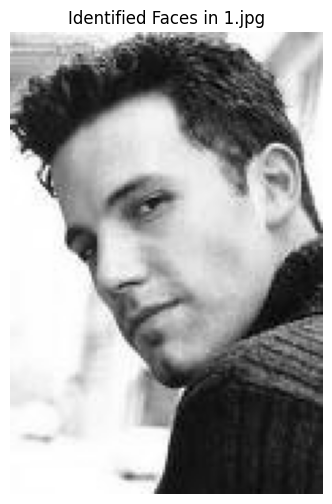

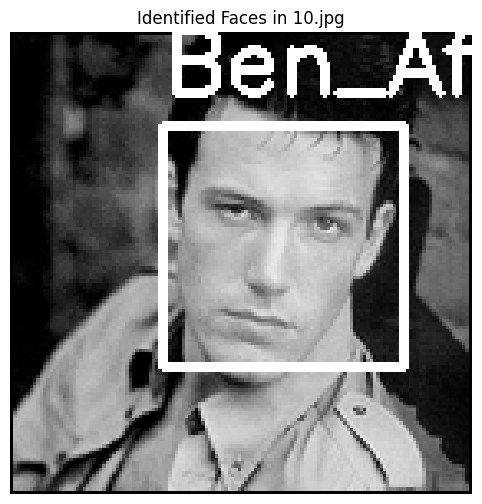

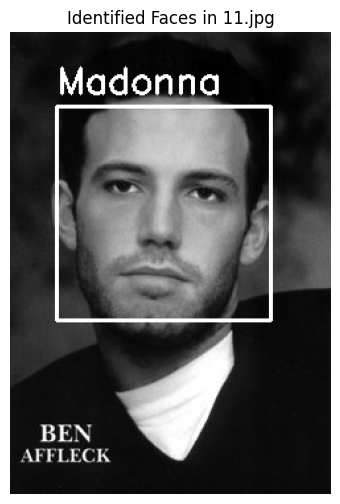

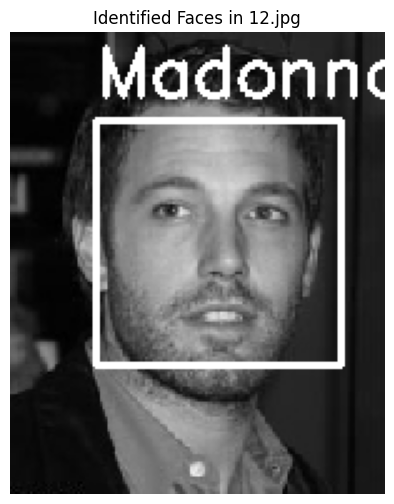

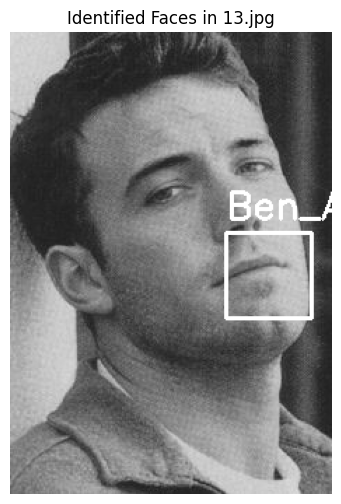

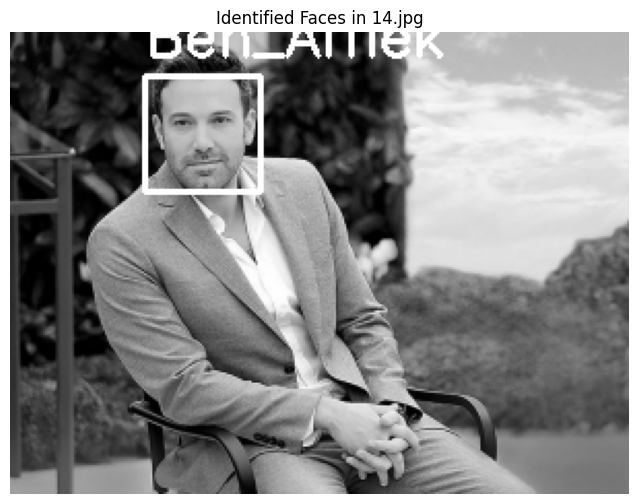

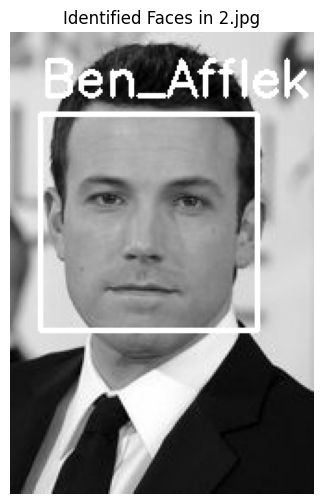

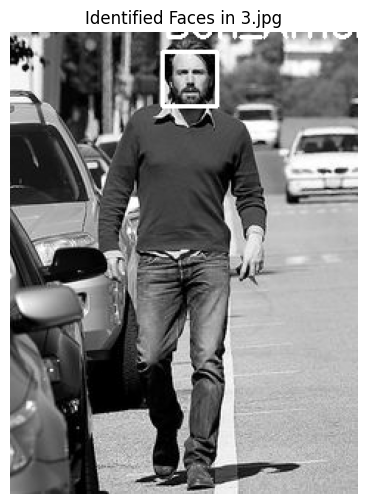

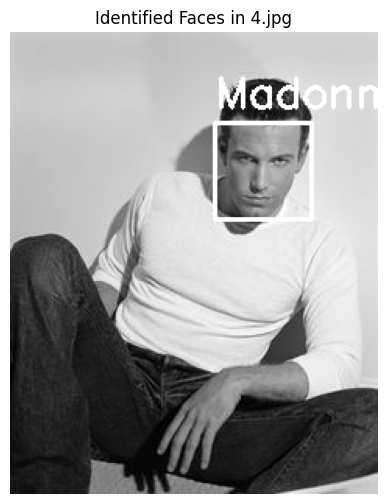

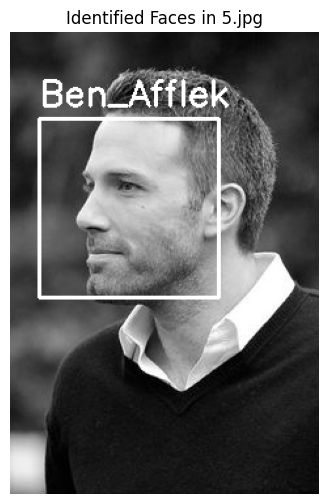

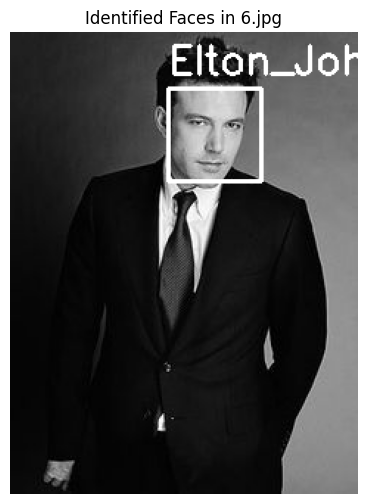

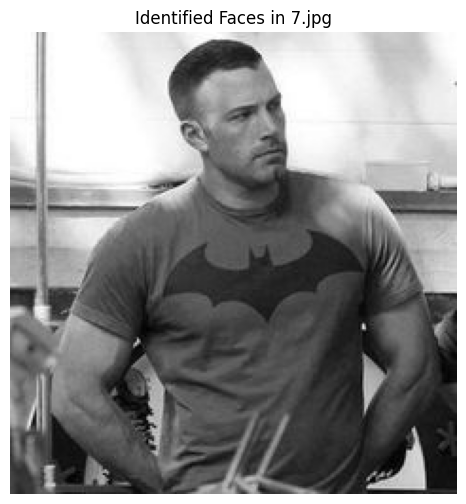

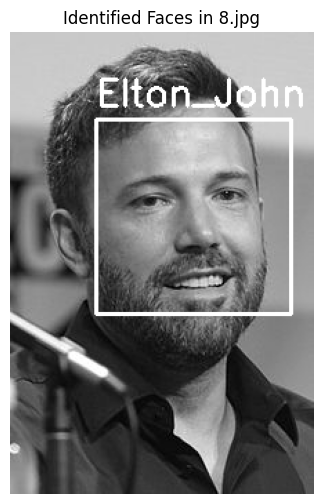

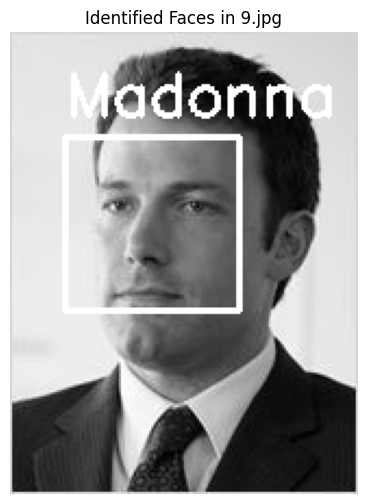

In [8]:
# checkhing in individual image


def load_images_from_directory(directory):
    images = []
    filenames = []

    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
                filenames.append(filename)
    
    return images, filenames

def recognize_faces_in_images(images, filenames, recognizer, face_cascade, label_dict):
    results = []

    for i, image in enumerate(images):
        faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            face = image[y:y+h, x:x+w]
            label, confidence = recognizer.predict(face)
            name = label_dict[label]
            
            # Draw rectangle and label on the image
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(image, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        
        results.append((filenames[i], image))
    
    return results

# Load images from the local directory
input_directory = "Faces\\train\\Ben_Afflek"
images, filenames = load_images_from_directory(input_directory)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Recognize faces in the images
results = recognize_faces_in_images(images, filenames, recognizer, face_cascade, label_dict)

# Display the results
for filename, image in results:
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Identified Faces in {filename}")
    plt.axis('off')
    plt.show()
